In [34]:
import pandas as pd 
import io 

In [35]:
from google.colab import files 

In [4]:
uploaded=files.upload()

Saving train_age_dataset.csv to train_age_dataset.csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "train_age_dataset.csv" with length 72490889 bytes


In [7]:
uploaded

In [8]:
data = pd.read_csv(io.StringIO(uploaded['train_age_dataset.csv'].decode('utf-8')))
data.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [9]:
data.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


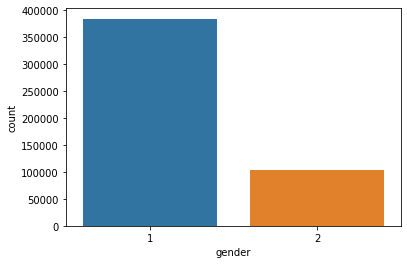

In [12]:
sns.countplot('gender',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


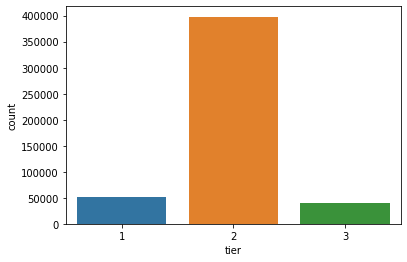

In [13]:
sns.countplot('tier',data=data)

In [14]:
data=data.sample(frac=1).reset_index(drop=True)

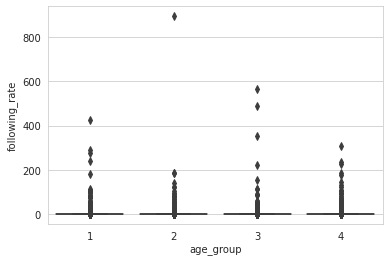

In [15]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'age_group', y = 'following_rate', data = data) 

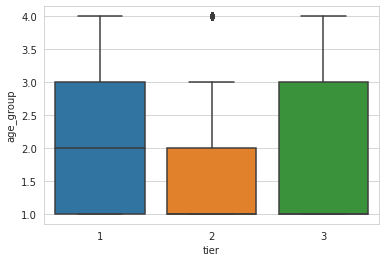

In [16]:
sns.boxplot(x = 'tier', y = 'age_group', data = data) 

In [17]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [18]:
enc_df = pd.DataFrame(enc.fit_transform(data[['tier']]).toarray())
data = data.join(enc_df)
data = data.rename(columns={0: 'tier_1', 1: 'tier_2',2:'tier_3' })
data.drop(['userId','tier','Unnamed: 0'],axis=1,inplace=True)
data.head(2)

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group,tier_1,tier_2,tier_3
0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.037037,0.483262,7.285714,41.421889,0,0.008,0.200000,0.0,0.112,0.000000,0.0,0.03200,0.088000,0.104,0.0,3,0.0,0.0,1.0
1,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.034987,2.285714,180.226571,0,0.000,0.065574,0.0,0.000,0.011475,0.0,0.02459,0.032787,0.000,0.0,1,0.0,1.0,0.0


In [19]:
enc_df1 = pd.DataFrame(enc.fit_transform(data[['gender']]).toarray())
data = data.join(enc_df1)
data = data.rename(columns={0: 'gender_male', 1: 'gender_female' })
data.drop(['gender'],axis=1,inplace=True)

In [20]:
X=data.drop(['age_group'],axis=1)
y=data['age_group']

In [21]:
from xgboost import XGBClassifier

In [22]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [23]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.0625,random_state=42)

In [36]:
model = XGBClassifier(learning_rate=0.025, max_depth=10, subsample = 0.9, n_estimators=750,objective='multi:softmax', num_class = 4)
model.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.025, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=1,
              nthread=None, num_class=4, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.9, verbosity=1)

In [37]:
model.score(train_x,train_y)

0.8550516885508441

In [39]:
model.score(test_x,test_y)

0.7590574374079528

In [40]:
uploaded=files.upload()

Saving test_age_dataset.csv to test_age_dataset.csv


In [41]:
test_data = pd.read_csv(io.StringIO(uploaded['test_age_dataset.csv'].decode('utf-8')))

In [42]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(test_data[['tier']]).toarray())
test_data = test_data.join(enc_df)
test_data = test_data.rename(columns={0: 'tier_1', 1: 'tier_2',2:'tier_3' })
test_data.drop(['userId','tier','Unnamed: 0'],axis=1,inplace=True)
enc_df1 = pd.DataFrame(enc.fit_transform(test_data[['gender']]).toarray())
test_data = test_data.join(enc_df1)
test_data = test_data.rename(columns={0: 'gender_male', 1: 'gender_female' })
test_data.drop(['gender'],axis=1,inplace=True)

In [45]:
test_data.head(2)

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,tier_1,tier_2,tier_3,gender_male,gender_female
0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.033242,4.5,120.313571,0,0.0,0.062992,0.0,0.0,0.012598,0.0,0.0,0.062992,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.0,0.051057,9.5,188.615500,0,0.0,0.003636,0.0,0.0,0.000727,0.0,0.0,0.003636,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [46]:
predict = model.predict(test_data)

In [47]:
df = pd.DataFrame({"prediction" : predict}, columns = ["prediction"]).set_index("prediction")

In [48]:
df.head()

""
prediction
1
1
1
2
1


In [49]:
def download_preds(df, file_name = 'outliers_4_test_predicted.csv'):
  df.to_csv(file_name)
  from google.colab import files
  files.download(file_name)
download_preds(df, file_name = 'outliers_4_test_predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>